# Google Play Store Apps dataset

In [171]:
%autosave 60
pd.set_option('max_rows',200)
pd.set_option('min_rows',100)

Autosaving every 60 seconds


In [3]:
%matplotlib inline
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [23]:
playstore=pd.read_csv("googleplaystore.csv",delimiter=';',encoding='utf-8')

playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500,Free,0,Everyone,Art & Design,NaN,NaN,NaN
2,U Launcher Lite – FREE Live Cool Themes Hide Apps,ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100,Free,0,Everyone,Art & Design,NaN,NaN,NaN


In [24]:
playstore_free=playstore[playstore.Type=="Free"]
playstore_paid=playstore[playstore.Type=="Paid"]

In [25]:
playstore=pd.concat([playstore_free, playstore_paid])

In [27]:
playstore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500,Free,0,Everyone,Art & Design,NaN,NaN,NaN
2,U Launcher Lite – FREE Live Cool Themes Hide Apps,ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100,Free,0,Everyone,Art & Design,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10697,Mu.F.O.,GAME,5.0,2,16M,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up
10735,FP VoiceBot,FAMILY,NaN,17,157k,100,Paid,0.99,Mature 17+,Entertainment,"November 25, 2015",1.2,2.1 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4M,1,Paid,7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.8,252,11M,10,Paid,16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up


In [9]:
# Moyenne des notes en fonction du Content Rating (Age group the app is targeted at - Children / Mature 21+ / Adult). 
playstore['Rating']=pd.to_numeric(playstore['Rating'])
playstore.groupby("Content Rating").Rating.mean().sort_values()

Content Rating
Unrated            4.100000
Mature 17+         4.114286
Everyone           4.174605
Teen               4.228893
Everyone 10+       4.246774
Adults only 18+    4.300000
Name: Rating, dtype: float64

In [35]:
# Top des catégories avec le plus d'applications 
playstore.groupby('Category').App.count().sort_values()[-10:]

Category
SPORTS              348
COMMUNICATION       368
LIFESTYLE           368
PERSONALIZATION     376
PRODUCTIVITY        391
BUSINESS            449
MEDICAL             452
TOOLS               805
GAME               1138
FAMILY             1934
Name: App, dtype: int64

In [135]:
#10 apps avec le meilleur rapport reviews par installations

playstore['Rapport']=pd.to_numeric(playstore['Reviews'])/pd.to_numeric(playstore['Installs'])
top10_rapport=playstore.Rapport.sort_values(ascending = False)[:10]
top10_rapport.index=[0,1,2,3,4,5,6,7,8,9]
L=top10_rapport.to_list()


playstore[(playstore['Rapport']==L[0]) | (playstore['Rapport']==L[1]) | (playstore['Rapport']==L[2]) | (playstore['Rapport']==L[3]) | (playstore['Rapport']==L[4]) | (playstore['Rapport']==L[5]) | (playstore['Rapport']==L[6]) | (playstore['Rapport']==L[7]) |(playstore['Rapport']==L[8]) | (playstore['Rapport']==L[9])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rapport
4702,V Bucks ProTips New,SOCIAL,4.7,594,3.6M,1,Free,0.00,Everyone,Social,"July 19, 2018",1.0,2.1 and up,594.00
4556,Day R Premium,FAMILY,4.8,51068,57M,100,Paid,4.99,Teen,Role Playing,"June 21, 2018",1.574,4.0.3 and up,510.68
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,Varies with device,10,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device,1024.90
4946,Flud (Ad free),VIDEO_PLAYERS,4.8,5639,Varies with device,10,Paid,1.49,Everyone,Video Players & Editors,"September 7, 2017",Varies with device,Varies with device,563.90
6056,Be Stronger,HEALTH_AND_FITNESS,4.8,787,53M,1,Paid,1.99,Everyone,Health & Fitness,"July 31, 2018",1.4.7,4.0.3 and up,787.00
6618,bpresso PRO,MEDICAL,4.4,515,Varies with device,1,Paid,5.49,Everyone,Medical,"April 19, 2017",Varies with device,Varies with device,515.00
7037,BZ Reminder PRO,BUSINESS,4.8,726,5.4M,1,Paid,3.99,Everyone,Business,"December 20, 2017",2.3.3,4.1 and up,726.00
7165,My Movies Pro - Movie & TV Collection Library,LIFESTYLE,4.6,6477,20M,10,Paid,7.99,Everyone,Lifestyle,"July 16, 2018",2.26 Build 17,4.1 and up,647.70
9304,Carrier Landings Pro,FAMILY,4.6,5969,31M,10,Paid,12.99,Everyone,Simulation,"June 29, 2018",4.2.4,4.1 and up,596.90
9627,ai.type keyboard Plus + Emoji,TOOLS,4.5,57076,35M,100,Paid,4.49,Everyone,Tools,"July 24, 2018",Paid-9.4.1.3,4.1 and up,570.76


In [154]:
playstore['nbr']=1

In [15]:
# Nombre d'applications en fonction des catégories et de la version android nécessitée pour fonctionner
apps_androidv=playstore.pivot_table('nbr',index='Category',columns='Type',aggfunc=sum)
apps_androidv

Type,Free,Paid
Category,,
ART_AND_DESIGN,61.0,2.0
AUTO_AND_VEHICLES,76.0,3.0
BEAUTY,47.0,NaN
BOOKS_AND_REFERENCE,197.0,27.0
BUSINESS,436.0,13.0
COMICS,54.0,NaN
COMMUNICATION,343.0,25.0
DATING,188.0,4.0
EDUCATION,138.0,4.0


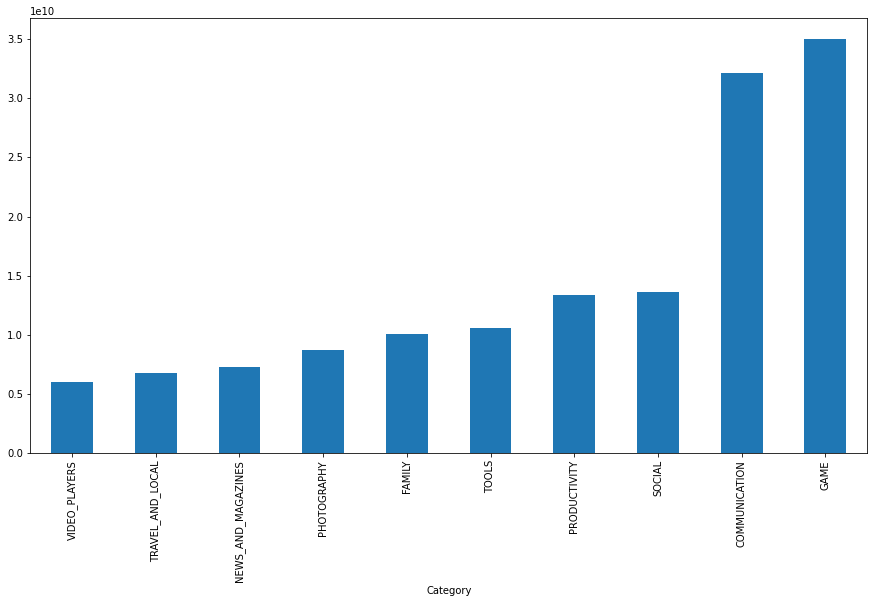

In [150]:
# Catégorie d'app avec le plus d'installation (top 10)
playstore['Installs']=pd.to_numeric(playstore['Installs'])
a=playstore.groupby('Category').Installs.sum().sort_values()[-10:]
a.plot.bar(figsize=(15,8))

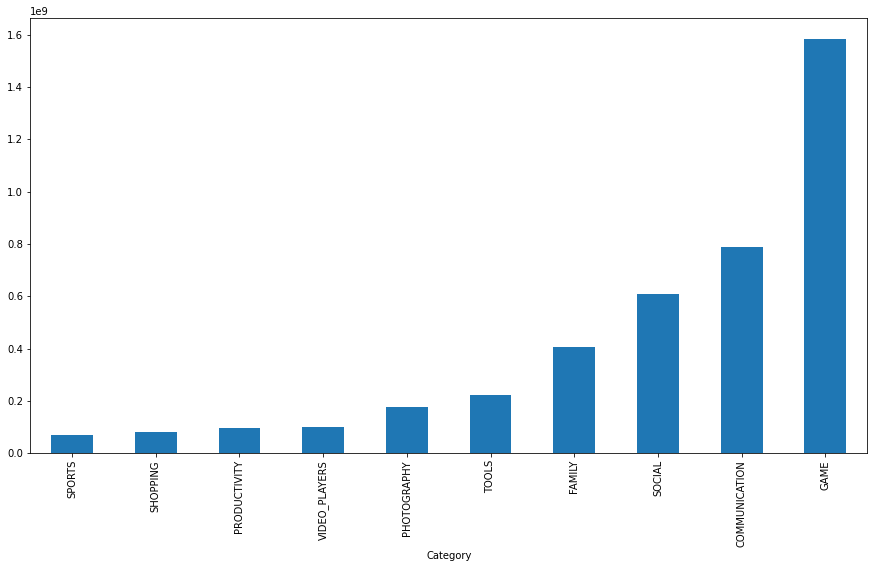

In [149]:
# Catégorie d'app avec le plus de reviews (top 10)
playstore['Reviews']=pd.to_numeric(playstore['Reviews'])
a=playstore.groupby('Category').Reviews.sum().sort_values()[-10:]
a.plot.bar(figsize=(15,8))

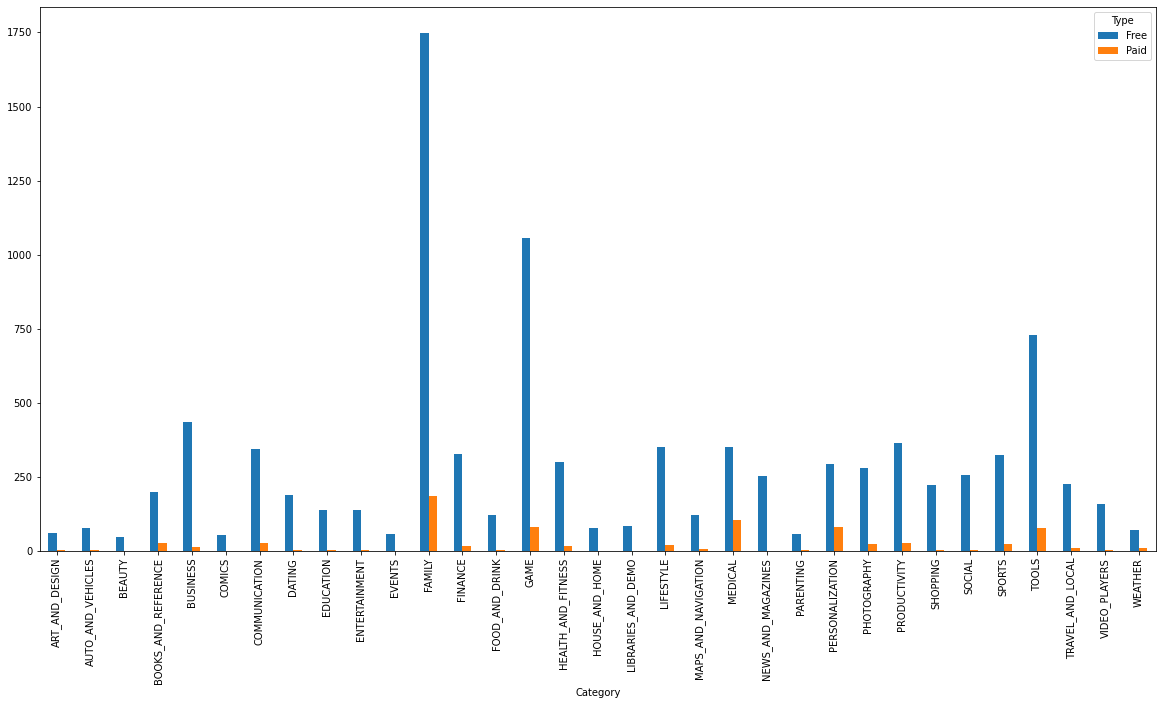

In [63]:
apps_androidv.plot.bar(figsize=(20,10))

In [50]:
playstore['Price']=pd.to_numeric(playstore['Price'])
prix_plot=playstore.groupby('Price').App.count().sort_values(ascending = False)

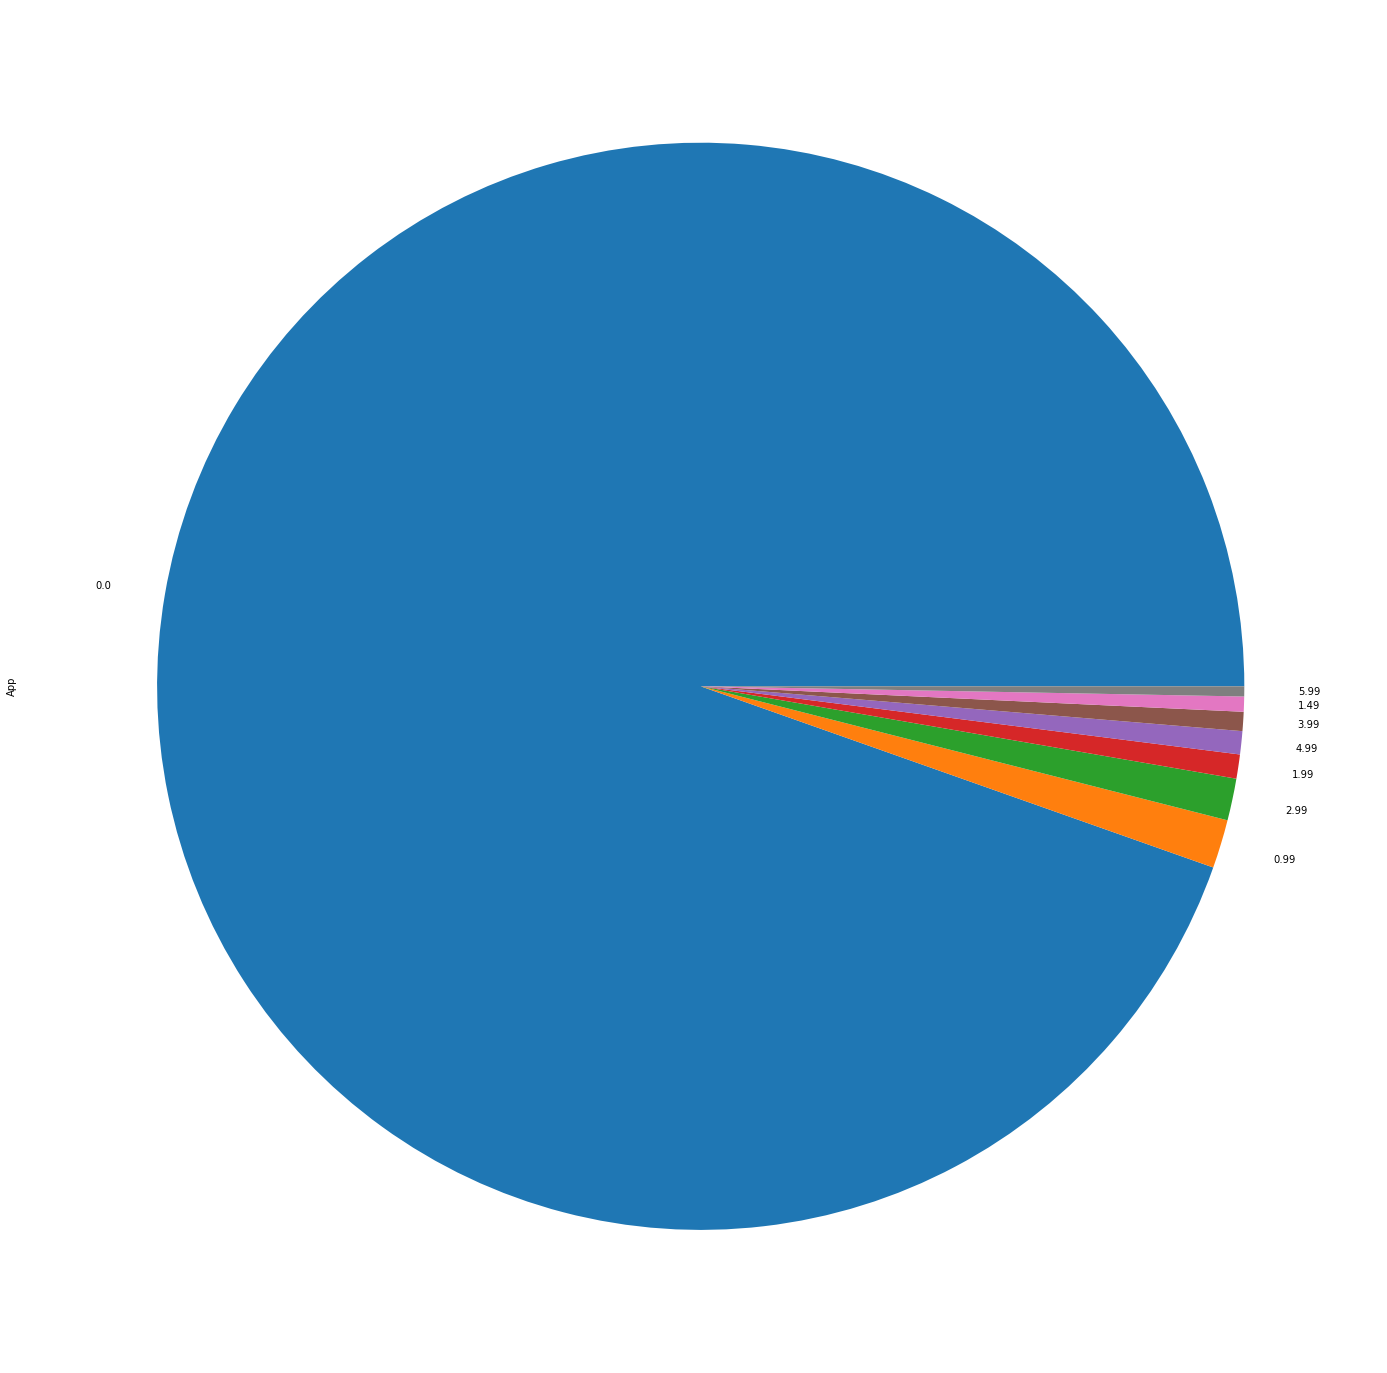

In [59]:
prix_plot[:5.99].plot.pie(figsize=(25, 25))

Groupby - Apply

In [161]:
#Colonne avec proportion d'application selon Category et Content rating

b=playstore

def add_prop(group):
    group['PropAPP_Cat_Cont'] = group.nbr / group.nbr.sum()
    return group

b=b.groupby(['Category','Content Rating']).apply(add_prop)
b

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rapport,nbr,PropAPP_Cat_Cont
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10,Free,0.00,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,15.900000,1,0.016949
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500,Free,0.00,Everyone,Art & Design,NaN,NaN,NaN,1.934000,1,0.016949
2,U Launcher Lite – FREE Live Cool Themes Hide Apps,ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.00,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0.017502,1,0.016949
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.00,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0.004313,1,0.333333
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100,Free,0.00,Everyone,Art & Design,NaN,NaN,NaN,9.670000,1,0.016949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10697,Mu.F.O.,GAME,5.0,2,16M,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up,2.000000,1,0.001656
10735,FP VoiceBot,FAMILY,NaN,17,157k,100,Paid,0.99,Mature 17+,Entertainment,"November 25, 2015",1.2,2.1 and up,0.170000,1,0.020000
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4M,1,Paid,7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up,35.000000,1,0.003460
10782,Trine 2: Complete Story,GAME,3.8,252,11M,10,Paid,16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up,25.200000,1,0.003040


In [159]:
b.groupby(['Category','Content Rating']).test.sum()

Category           Content Rating
ART_AND_DESIGN     Everyone          1.0
                   Everyone 10+      1.0
                   Teen              1.0
AUTO_AND_VEHICLES  Everyone          1.0
                   Everyone 10+      1.0
                                    ... 
VIDEO_PLAYERS      Teen              1.0
WEATHER            Everyone          1.0
                   Everyone 10+      1.0
                   Mature 17+        1.0
                   Teen              1.0
Name: test, Length: 117, dtype: float64

In [170]:
# TOP 100 APP les plus installées
def get_top100(df,column='Installs'):
    return df.sort_values(by=column,ascending=False)[:100]

def get_top1(df,column='Installs'):
    return df.sort_values(by=column,ascending=False)[:1]

In [176]:
top1=b.groupby(['Category','Content Rating']).apply(get_top1)
top1

App  \
Category            Content Rating                                                             
ART_AND_DESIGN      Everyone        19                                          ibis Paint X   
                    Everyone 10+    22               Superheroes Wallpapers | 4K Backgrounds   
                    Teen            3                                  Sketch - Draw & Paint   
AUTO_AND_VEHICLES   Everyone        8289                       AutoScout24 - used car finder   
                    Everyone 10+    77                  Police Detector (Speed Camera Radar)   
BEAUTY              Everyone        117                        Beauty Camera - Selfie Camera   
                    Everyone 10+    113                            Wrinkles and rejuvenation   
                    Mature 17+      133                       Dresses Ideas & Fashions +3000   
                    Teen            126                         Skin Care and Natural Beauty   
BOOKS_AND_REFERENCE Everyone        5324                           Al'Quran Bahasa Indonesia   
                    Everyone 10+    186                         English Dictionary - Offline   
                    Mature 17+      166                                    Read books online   
                    Teen            152                                    Google Play Books   
BUSINESS            Everyone        10253             File Commander - File Manager/Explorer   
                    Everyone 10+    6701                                         Mu Elite BR   
                    Mature 17+      7190                                           CD Supply   
                    Teen            10236                          EasyLive - FB Live Helper   
COMICS              Adults only 18+ 298             Manga Master - Best manga & comic reader   
                    Everyone        330                                       Perfect Viewer   
                    Everyone 10+    326    Buff Thun - Daily Free Webtoon / Comics / Web ...   
                    Mature 17+      327                   pixiv comic - everyone's manga app   
                    Teen            297                           LINE WEBTOON - Free Comics   
COMMUNICATION       Everyone        335             Messenger – Text and Video Chat for Free   
                    Mature 17+      370                                             Telegram   
                    Teen            378          UC Browser - Fast Download Private & Secure   
DATING              Everyone        671               Cardi B Live Stream Video Chat - Prank   
                    Mature 17+      482                       Zoosk Dating App: Meet Singles   
                    Teen            559                      95Live -SG#1 Live Streaming App   
EDUCATION           Everyone        699                       Duolingo: Learn Languages Free   
                    Everyone 10+    700                                                  TED   
                    Mature 17+      724                                       THAI DICT 2018   
                    Teen            848                    SoloLearn: Learn to Code for Free   
ENTERTAINMENT       Everyone        893                                  Talking Ben the Dog   
                    Everyone 10+    917                                                 Nick   
                    Mature 17+      914                                                STARZ   
                    Teen            865                                    Google Play Games   
EVENTS              Everyone        1005                          Ticketmaster Event Tickets   
                    Everyone 10+    1024                   Sarajevo Film Festival - Official   
                    Teen            1009                                               Fever   
FAMILY              Everyone        3879                                                 Pou   
                    Everyone 10+    2016                 

In [175]:
top1.reset_index(inplace=True,drop=True)
top1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rapport,nbr,PropAPP_Cat_Cont
0,ibis Paint X,ART_AND_DESIGN,4.6,224399,31M,10000000,Free,0.00,Everyone,Art & Design,"July 30, 2018",5.5.4,4.1 and up,0.022440,1,0.016949
1,Superheroes Wallpapers | 4K Backgrounds,ART_AND_DESIGN,4.7,7699,4.2M,500,Free,0.00,Everyone 10+,Art & Design,"July 12, 2018",2.2.6.2,4.0.3 and up,15.398000,1,1.000000
2,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.00,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0.004313,1,0.333333
3,AutoScout24 - used car finder,AUTO_AND_VEHICLES,4.4,186648,42M,10000000,Free,0.00,Everyone,Auto & Vehicles,"August 2, 2018",9.3.52,4.2 and up,0.018665,1,0.012821
4,Police Detector (Speed Camera Radar),AUTO_AND_VEHICLES,4.3,3574,3.9M,1000000,Free,0.00,Everyone 10+,Auto & Vehicles,"July 4, 2018",1.6,4.0 and up,0.003574,1,1.000000
5,Beauty Camera - Selfie Camera,BEAUTY,4.0,113715,Varies with device,10000000,Free,0.00,Everyone,Beauty,"August 3, 2017",Varies with device,Varies with device,0.011371,1,0.024390
6,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,100,Free,0.00,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up,1.820000,1,0.500000
7,Dresses Ideas & Fashions +3000,BEAUTY,4.5,473,8.2M,100,Free,0.00,Mature 17+,Beauty,"March 1, 2017",1.0.2.0,1.6 and up,4.730000,1,1.000000
8,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,100,Free,0.00,Teen,Beauty,"July 17, 2018",1.15,4.1 and up,6.540000,1,0.333333
9,Al'Quran Bahasa Indonesia,BOOKS_AND_REFERENCE,4.6,361780,9.7M,10000000,Free,0.00,Everyone,Books & Reference,"May 30, 2018",4.1,2.3 and up,0.036178,1,0.005076
